# Logistic Regression-3

Q1. Explain the concept of precision and recall in the context of classification models.

Ans. 

|Precision|Recall|
|---|---|
|Out of all actual values, how many are correctly predicted| Out of all predicted values, how many are correctly predicted with actual values|
|When FP is more important, we use Precision| When FN is more important, we use Recall|
| Precision : $$ \frac{TP}{TP+FP} $$|Recall :$$ \frac{TP}{TP+FP} $$|

where,
- TP : True Positive
- FP : False Positive
- TN : True Negative
- FN : False Negative


Q2. What is the F1 score and how is it calculated? How is it different from precision and recall?

Ans.  The F1-score is the harmonic mean of precision and recall and provides a balanced measure of a model's performance, considering both false positives and false negatives.

The General formula for F-beta score is : $$ (1+\beta^2)* \frac{\text{Precision}*\text{Recall}}{\text{Precision} + \text{Recall}} $$

if FP and FN both are important, $\beta=1$, so we get,

$$ (1+1^2)* \frac{\text{Precision}*\text{Recall}}{\text{Precision} + \text{Recall}} $$

or

$$ 2* \frac{\text{Precision}*\text{Recall}}{\text{Precision} + \text{Recall}} $$

Q3. What is ROC and AUC, and how are they used to evaluate the performance of classification models?

Ans. ROC (Receiver Operating Characteristic) and AUC (Area Under the ROC Curve) are graphical and numerical metrics used to evaluate the performance of classification models, particularly binary classifiers. They are widely used in machine learning and provide insights into a model's ability to discriminate between positive and negative classes at different threshold settings.

**ROC Curve**:
- The ROC curve is a graphical representation of a classifier's performance across various threshold settings. It plots the True Positive Rate (TPR), also known as Sensitivity or Recall, against the False Positive Rate (FPR) for different threshold values.
- TPR measures the proportion of true positive predictions (correctly identified positives) out of all actual positives.
- FPR measures the proportion of false positive predictions (incorrectly identified positives) out of all actual negatives.

The ROC curve typically ranges from (0, 0) to (1, 1), where the diagonal line represents random guessing (an area under the curve of 0.5).

**AUC (Area Under the ROC Curve)**:
- AUC quantifies the overall performance of a classifier by calculating the area under the ROC curve.
- AUC ranges from 0 to 1, where higher values indicate better performance. A perfect classifier has an AUC of 1, while a random classifier has an AUC of 0.5 (the diagonal line).
- AUC provides a single scalar value that summarizes a classifier's ability to distinguish between positive and negative classes across various threshold settings. A higher AUC implies better discrimination.

**Use in Model Evaluation**:
- ROC and AUC are particularly useful for evaluating classifiers when class imbalance exists or when different misclassification costs are associated with false positives and false negatives.
- Model comparison: ROC and AUC allow for direct comparison between different models or algorithms, helping to identify the one with better discriminative power.
- Threshold selection: ROC analysis helps in choosing an appropriate classification threshold based on the desired balance between TPR and FPR.

**Interpretation**:
- An AUC of 0.5 indicates a classifier that performs no better than random guessing.
- An AUC between 0.5 and 1 suggests varying degrees of model discrimination, with higher values indicating better performance.
- A perfect classifier has an AUC of 1, which implies that it can distinguish between the positive and negative classes perfectly across all possible threshold settings.

Example using random data is as shown:

In [1]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=1000, n_classes=2, n_clusters_per_class=2)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=23)

from sklearn.linear_model import LogisticRegression

regressor=LogisticRegression()

regressor.fit(X_train, y_train)

y_pred=regressor.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_pred=y_pred, y_true=y_test))
print(confusion_matrix(y_pred=y_pred, y_true=y_test))
print(classification_report(y_pred=y_pred, y_true=y_test))

0.892
[[102   8]
 [ 19 121]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       110
           1       0.94      0.86      0.90       140

    accuracy                           0.89       250
   macro avg       0.89      0.90      0.89       250
weighted avg       0.90      0.89      0.89       250



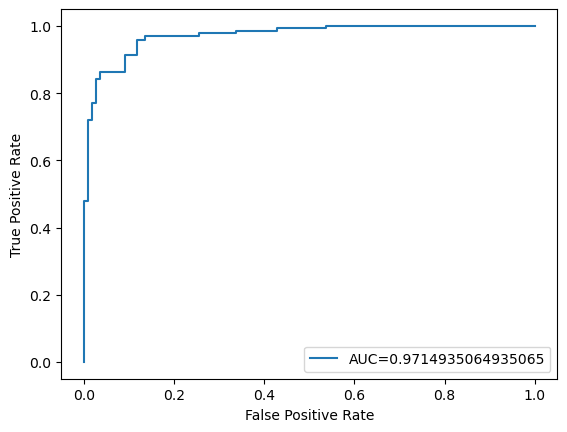

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

#define metrics
y_pred_proba = regressor.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

The curve and the high AUC score shows that our model predicts the data very well.

Q4. How do you choose the best metric to evaluate the performance of a classification model?
What is multiclass classification and how is it different from binary classification?

Ans. Choosing the best metric to evaluate the performance of a classification model depends on several factors:
- **Accuracy**: Measures the overall correctness of predictions but can be misleading for imbalanced datasets.
- **Precision**: Measures the proportion of true positive predictions among all positive predictions. Useful when false positives are costly.
- **Recall (Sensitivity)**: Measures the proportion of true positive predictions among all actual positive instances. Useful when false negatives are costly.
- **F1-Score**: The harmonic mean of precision and recall, providing a balance between the two.
- **Specificity (True Negative Rate)**: Measures the proportion of true negative predictions among all actual negative instances. Important for scenarios where false positives are highly undesirable.

Multiclass classification is a machine learning task where the goal is to classify data points into one of three or more distinct classes or categories. In contrast, binary classification involves classifying data into one of two possible classes or categories. The key difference is in the number of classes or categories being predicted:

- **Multiclass Classification**: In this scenario, the model assigns each data point to one of three or more classes. For example, classifying images of animals into categories like "cat," "dog," "horse," and "bird" is a multiclass classification task.

- **Binary Classification**: In binary classification, the model predicts whether each data point belongs to one of two classes. Examples include spam email detection (spam or not spam) or medical diagnosis (positive or negative for a disease).


Q5. Explain how logistic regression can be used for multiclass classification.

Ans. Logistic regression, originally designed for binary classification, can be extended to handle multiclass classification problems using several techniques. One common approach is the "One-vs-Rest" method. Here's how logistic regression can be adapted for multiclass classification:

**One-vs-Rest (OvR) Approach**:

1. **Dataset Preparation**: In a multiclass classification problem with, for example, N classes, you first prepare we dataset with N target variables (one for each class). For each data point, you create N binary target variables, where one variable is set to 1 for the correct class and 0 for the other classes. This effectively transforms the problem into N binary classification subproblems.

2. **Training Multiple Binary Classifiers**: We train N separate binary logistic regression classifiers, one for each class. In the training of each classifier, the samples belonging to the corresponding class are considered as the positive class (label 1), and all other samples are considered as the negative class (label 0).

3. **Prediction**: To make a multiclass prediction for a new data point, we apply each of the N binary classifiers to the input data. The classifier that assigns the highest probability (or logistic regression output) is selected as the predicted class.

4. **Decision Threshold**: We can choose a decision threshold (e.g., 0.5) to determine class membership. If the probability of the positive class is above this threshold, the class is predicted; otherwise, it's not.

Q6. Describe the steps involved in an end-to-end project for multiclass classification.

Ans. The steps involved in an end-to-end project for multiclass classification are:

1. **Problem Definition and Data Collection:** Clearly define the problem you want to solve with multiclass classification. Gather and collect relevant data for the problem. Ensure the data is labeled with the target classes.

2. **Data Preprocessing:**
   - Explore the dataset to understand its characteristics, including the distribution of classes, missing values, and outliers.
   - Handle missing data through techniques like imputation or removal.
   - Address outliers if they exist.
   - Split the dataset into training, validation, and test sets.

3. **Feature Engineering:**
   - Select relevant features for the classification task.
   - Transform and preprocess features, including one-hot encoding for categorical variables, normalization, and scaling for numerical variables.
   - Create new features if necessary.

4. **Model Selection:**
   - Choose an appropriate machine learning algorithm for multiclass classification, such as decision trees, random forests, support vector machines, or deep neural networks.
   - Consider the characteristics of your data and the problem requirements when selecting a model.

5. **Model Training:**
   - Train the selected model on the training dataset.
   - Use appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) to monitor the model's performance on the validation set.
   - Fine-tune hyperparameters to optimize model performance through techniques like grid search or random search.

6. **Model Evaluation:**
   - Assess the model's performance on the test dataset to evaluate its generalization ability.
   - Visualize and analyze the confusion matrix, ROC curves, and other relevant metrics to gain insights into the model's strengths and weaknesses.

8. **Model Deployment :**
   - If the model meets your performance requirements, deploy it in a production environment for real-world use.
   - Implement an API or integration to make predictions on new data.


Q7. What is model deployment and why is it important?

Ans. Model deployment is the process of taking a machine learning or statistical model that has been trained on historical or training data and making it available for use in real-world, operational environments. In other words, it involves taking the model from a development or research stage and deploying it so that it can provide predictions or decisions on new, unseen data.

Importance:

1. **Real-World Utilization**
2. **Automation and Efficiency**
3. **Scalability**
4. **Consistency**
5. **Real-Time and Batch Processing**
6. **Feedback Loop**
7. **Cost Savings**
8. **Competitive Advantage**:

Q8. Explain how multi-cloud platforms are used for model deployment.

Ans. Multi-cloud platforms are used for model deployment to harness the advantages of multiple cloud service providers (CSPs) or cloud environments to host and run machine learning models. This approach offers several benefits:

1. **Flexibility and Vendor Neutrality**: Multi-cloud platforms allow organizations to avoid vendor lock-in by deploying models across multiple CSPs. This ensures flexibility and the ability to choose the best CSP for each specific use case or geographic region.

2. **Redundancy and High Availability**: By deploying models on multiple cloud providers, redundancy and high availability are achieved. If one CSP experiences downtime or issues, models can still be accessed and operational on other CSPs, reducing the risk of service disruptions.

3. **Cost Optimization**: Multi-cloud strategies enable cost optimization by leveraging the price competitiveness of different CSPs. Organizations can select the most cost-effective CSP for a particular task or workload, resulting in potential cost savings.

4. **Global Reach**: Multi-cloud deployment allows organizations to deploy models across multiple regions and data centers offered by different CSPs, ensuring low-latency access to users worldwide.

5. **Performance Optimization**: Organizations can optimize model deployment by selecting CSPs that offer specialized hardware or services tailored to specific machine learning workloads. For example, one CSP may excel in GPU-intensive tasks, while another may offer optimized AI accelerators.

6. **Risk Mitigation**: Diversifying deployment across multiple CSPs reduces the risk associated with a single point of failure. This can be especially important for mission-critical applications where downtime is not acceptable.

7. **Data Sovereignty and Compliance**: Multi-cloud platforms enable organizations to address data sovereignty and compliance requirements by deploying models in CSPs with data centers located in specific regions or countries to meet local regulations.

8. **Scalability**: Multi-cloud environments offer scalable resources, allowing organizations to easily scale their model deployment infrastructure up or down based on changing demands.

9. **Hybrid Cloud Integration**: Multi-cloud strategies can be integrated with on-premises or hybrid cloud environments, providing a seamless and consistent deployment experience across different infrastructure types.

10. **Disaster Recovery and Backup**: In the event of data loss or catastrophic failure in one CSP, organizations can rely on backup copies of their models and data stored on other CSPs, ensuring disaster recovery capabilities.


Q9. Discuss the benefits and challenges of deploying machine learning models in a multi-cloud
environment.

Ans. Deploying machine learning models in a multi-cloud environment offers several benefits but also presents challenges that organizations need to consider. Here's an overview of the advantages and challenges:

**Benefits of Deploying Machine Learning Models in a Multi-Cloud Environment:**

1. **Vendor Neutrality**: Organizations can avoid vendor lock-in by using multiple cloud providers, ensuring that they are not reliant on a single vendor's technology stack or pricing model.

2. **Flexibility and Choice**: A multi-cloud approach allows organizations to select the best cloud provider for specific use cases or geographic regions based on factors like cost, performance, and compliance.

3. **Redundancy and High Availability**: Models can be deployed across multiple cloud providers to achieve redundancy and high availability. If one provider experiences downtime, models can still be accessed from other providers.

4. **Cost Optimization**: Organizations can take advantage of cost variations among cloud providers to minimize expenses. This includes selecting the most cost-effective provider for each workload or task.

5. **Global Reach**: Multi-cloud deployment ensures low-latency access to models for users worldwide by leveraging cloud provider data centers in various geographic locations.

6. **Performance Optimization**: Different cloud providers offer specialized hardware and services, enabling organizations to optimize performance for specific machine learning workloads.

7. **Risk Mitigation**: Diversifying deployment across multiple cloud providers reduces the risk associated with a single point of failure, enhancing resilience and disaster recovery capabilities.

**Challenges of Deploying Machine Learning Models in a Multi-Cloud Environment:**

1. **Complexity**: Managing models, data, and infrastructure across multiple cloud providers can be complex and challenging, requiring additional expertise and tools for orchestration and governance.

2. **Data Consistency**: Ensuring consistent and up-to-date data across multiple cloud providers can be challenging, as data replication and synchronization mechanisms are needed.

3. **Interoperability**: Ensuring that models and services can seamlessly communicate and interoperate across different cloud providers may require additional development effort.

4. **Security**: Implementing consistent security measures across multiple cloud providers can be difficult, increasing the risk of misconfigurations and security vulnerabilities.

5. **Compliance**: Managing compliance with regulatory requirements across different cloud environments can be complex and may require additional effort to ensure adherence to data protection laws and standards.

6. **Cost Management**: While cost optimization is a benefit, it can also be a challenge to track and manage costs effectively across multiple cloud providers, potentially leading to cost overruns.

7. **Vendor-Specific Features**: Organizations may need to avoid or carefully manage the use of cloud provider-specific features or services to maintain portability and minimize vendor lock-in.

8. **Skills and Training**: Managing a multi-cloud environment may require additional training and expertise for the IT and development teams to navigate multiple cloud provider interfaces and services.
